#  Linear Systems and Superposition
 ___________________________________________________________

________________________________________________________________________________________________________________________

A linear system follows the laws of superposition. This law is necessary and sufficient condition to prove the linearity of the system. Apart from this, the system is a combination of two types of laws −
Mathematically a system is called linear if it possesses two properties :
 -  Homogeneity 
 -  Additivity 

By proving that a system has homogeneity and that activity we will verify the system is linear .The third property is known as shifts invariants.These three properties form the mathematics of how the system is used in DSP.


### Homogeneous property  block diagram 
![image](img1/1.jpg)
Here we will my multiplying the signal with constant K and it will be equivalent to multypying the same constant after the system block .A system is said to be homogeneous if an amplitude change in the input results in an identical  change in the output
### Additivity  property  block diagram 
![image.png](img1/additivity.jpg)
Here we will be taking two signals and adding them before applying the transo


linearity describes that you can describe the effects of a system by separating the input signal into simple parts and using superposition at the output to restore the overall system output. Mathematically, we say that a system with transformation Tr is linear if the following holds:


If y1(n) & y2(n) are the responses of a system when x1(n) & x2(n) are the respective inputs, then the system is linear if and only if 

T [x1(n) +  x2(n)] = T[x1(n)] + T[x2(n)]

= y1(n) + y2(n) (Additive property)
 
T[ax(n)] = a * T[x(n)] = a y(n) (Scaling or Homogeneity)

The two properties can be combined into principle of superposition stated as

##### T[ax1(n) +  bx2(n)]=  aT[x1(n)] + bT[x2(n)]


### Shift Invariance

A shift invariant system is the discrete equivalent of a time-invariant system, defined such that if  y(n) is the response of the system to  x(n), then   y(n-k) is the response of the system to   x(n-k). That is, in a shift-invariant system the contemporaneous response of the output variable to a given value of the input variable does not depend on when the input occurs, time shifts are irrelevant in this regard.




In [48]:
import numpy as np 
import matplotlib.pyplot as plot

t = np.linspace(-10, 10, 1000)
x1 = lambda t: np.sin(t)
x2 = lambda t: (t % (2*np.pi))/np.pi

def checkLinearity(Tr, titleStr):
    x1plusx2 = lambda t: x1(t)+x2(t)
    plt.subplot(223)
    plt.plot(t, x1(t))
    plt.plot(t, x2(t))
    plt.plot(t, x1plusx2(t))
    
    plt.subplot(224)
    plt.plot(t, Tr(x1)(t))
    plt.plot(t, Tr(x2)(t))
    plt.plot(t, Tr(x1)(t)+Tr(x2)(t), 'b--', lw=5)
    plt.plot(t, Tr(x1plusx2)(t))
    
    plt.subplot(221)
    plt.plot(t, x1(t))
    
    plt.subplot(222)
    plt.plot(t, x2(t))

Here We took 2 different signals , triangular and a sine wave . we will be summing them together to check the property of linearity . Clearly, this system is linear, since the 


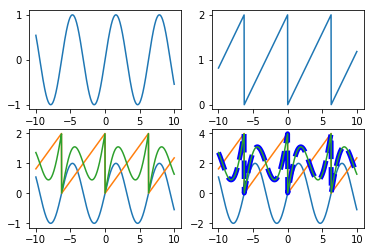

In [45]:
def Tr(x):
    return lambda t: 2*x(t)
checkLinearity(Tr, '$y(t)=2x(t)$')


- Orange plot  which is T[ax1(n) +  bx2(n)]  
- Blue plot which is aT[x1(n)] + bT[x2(n)]  

As Both are overlaping we can conclude that the given system is linear 

Now let us consider another system to test for linearity  

### y(t)=x(t)^3

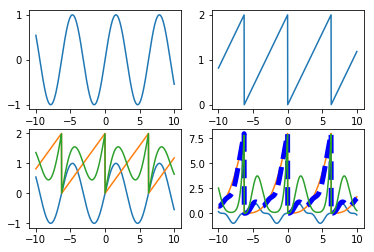

In [50]:
def Tr(x):
    return lambda t: x(t)**3
checkLinearity(Tr, '$y(t)=x(t)^2$')

As you can see both the signals have not overlapped hence we can conclude that the signals are non linear


### Signal Synthesis and Decomposition 

When we are processing signals  with linear systems  the only method  signals can be combined together  is by scaling followed by addition. A signal cannot be multiplied by another signal. N  signals: x0[n], x1[n], x2[n].....Xn[n]  are added to form a finsal resultant signal, X[n]. This process of combining signals through scaling and addition is called Signal synthesis.

### Python code for Supersposition of n Sine signals 

Now let us write an illustrative python script to superpose the given sine signals and produce the resultant output 

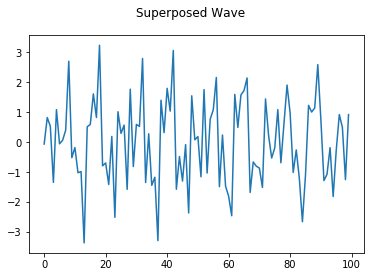

<Figure size 432x288 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt
from numpy import sin, linspace, nditer, zeros, pi, random, correlate


nwaves  = 4
cfreq   = 1500
bwidth  = 5000
npt     = 100

# Define min and max frequencies
freqMin = cfreq - bwidth/2      
freqMax = cfreq + bwidth/2

# To create Equally spaced frequencies 
freqSp  = linspace(freqMin, freqMax, nwaves)

# Sample at twice highest freq to satisfy  Nyquist condition
tmax    = float(npt)/(2.0*freqMax)           
t       = linspace(0, tmax, num=npt)
phi     = random.rand(nwaves)
phi     *= 2*pi

sumSine = zeros(npt, dtype=float)   

for (freq,phase) in zip(freqSp,phi):
    sumSine += sin(2*pi*freq*t + phase)

fig = plt.figure()
fig.suptitle("Superposed Wave")
plt.plot(sumSine)
fig = plt.figure()


### Signal Decomposition 

Decomposition is the inverse operation of synthesis, where a single signal is broken into two or more additive components. This is more involved than synthesis, because there are infinite possible decompositions for any given signa

#### 1. Impulse Decomposition
Impulse decomposition splits N samples signal into N component signals, each having N samples. Each of the component signals contains one point from the original signal, with the other values being zero. A single nonzero point in a string of zeros is called an impulse. Impulse decomposition is important because it allows signals to be examined one sample at a time. Similarly, systems are characterized by how they respond to impulses. By knowing how a system responds to an impulse, the system's output can be calculated for any given input. 

#### 2. Step Decomposition
Step decomposition also breaks an N sample signal into N component signals, each composed of N samples. Each component signal is a step, the first samples have a value of zero while the last samples are some constant value. 
Consider the decomposition of an 

N point signal  x[n]  into the components: x0[n], x1[n], x2[n], …, xN-1[n].

The kth component signal, xk[n], is composed of zeros for points 0 through k - 1, 

while the remaining points have a value of: x[k] - x[k-1]. 

